# Панова Мария 428 группа. Вариант 21

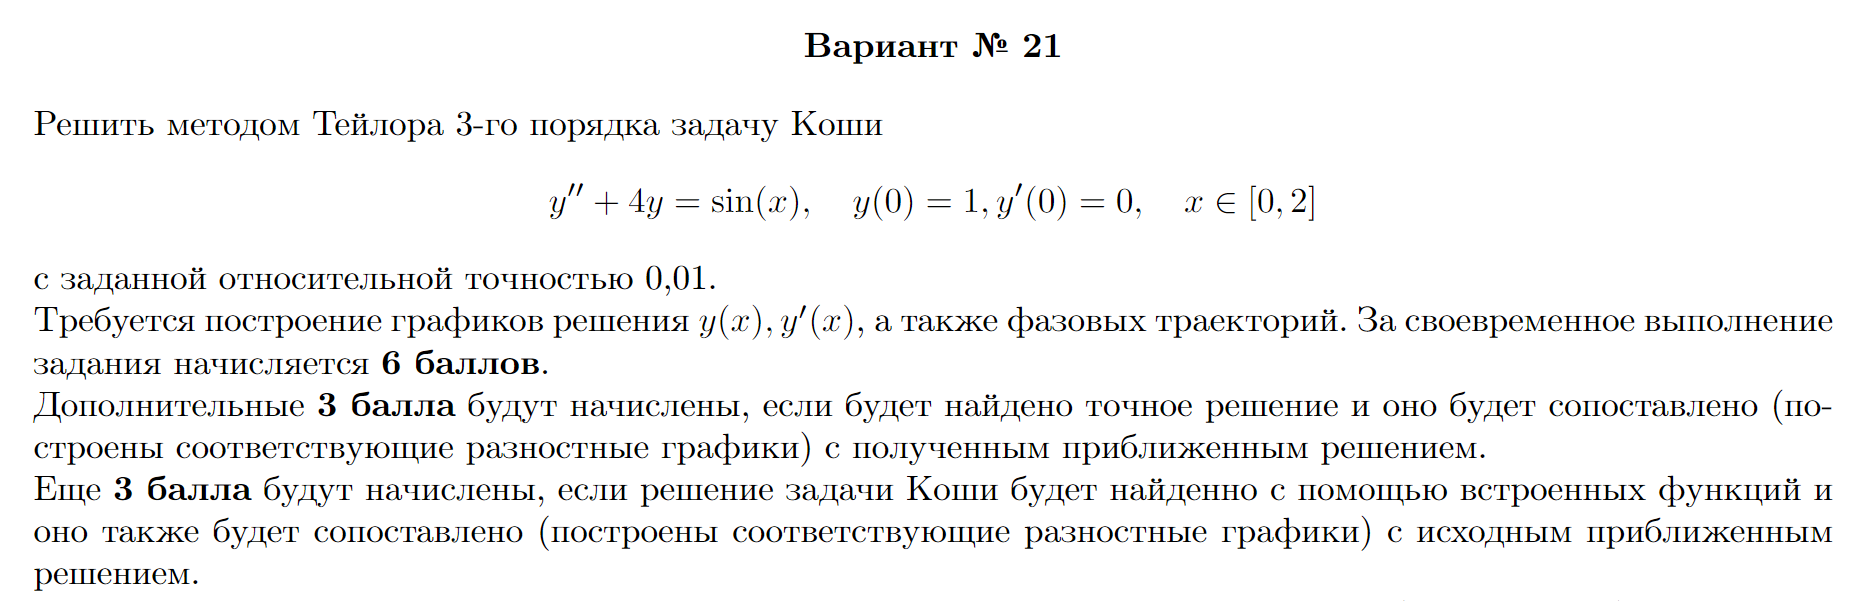

Один из приближенных методов решения задачи Коши для обыкновенного дифференциального уравнения основан на применении формулы
Тейлора.
Пусть, например, требуется найти решение дифференциального уравнения
$$y′ = F (x, y),  (1)$$

удовлетворяющее начальному условию:
$$y(x_0) = y_0.  (2)$$

Допустим, что решение существует и представимо в виде ряда Тейлора:
$$y′(x) = y(x_0)+{y'(x_0)\over1!}(x-x_0)+{y''(x_0)\over2!}(x-x_0)^2+...   (3)$$

Тогда сумма конечного числа членов этого ряда будет приближенно равняться искомому частному решению. Для того чтобы выписать ряд Тейлора нужно найти найти значения производных y′(x), y′′(x), y′′′(x), · · ·
в точке x0. Это можно сделать при помощи уравнения (1) и условия (2).
Дифференцируя (1) по x получим соотношения
$$y''=F'_x(x,y)+F'_y(x,y)y'  (4)$$

Подставляя x = x0 и y = y0 в предыдущие соотношения последовательно,
будем знать значения
y'(x_0), y''(x_0), y'''(x_0)...
Таким образом, можно написать приближенное равенство
$$y(x) = \sum_{i=1}^n {y^{(i)}(x_0)\over i!}(x-x_0)^i   (5)$$

Для тех значений x, для которых ряд Тейлора сходится, формула (5)
представляет приближенное решение рассматриваемой задачи.

# Метод Тейлора 3-его порядка

Можно показать, что в векторном виде итерационный процесс решения методом Тейлора 3-го порядка будет записываться в виде

$$
Y^{n+1}=Y^n+hy'(x)+{h^2\over 2!}y''(x)+{h^3\over 3!}y'''(x)
$$

Где все функции (вектора, матрицы) берутся в точке $Y^n, x^n$.

In [25]:
import math as m
import matplotlib.pyplot as plt
import numpy as np
import sys

sys.setrecursionlimit(5000)

In [26]:
def p1_y1 (x,i):
    if x == 0:
        return 0
    else:
        return y2(x,i)

def p1_y2 (x,i):
    if x == 0:
        return m.sin(0) - 4*y1(0,i)
    else:
        return m.sin(x) - 4*y1(x,i)

def p2_y1 (x,i):
    return p1_y2(x,i)
    
def p2_y2 (x,i):
    return m.cos(x) - 4*p1_y1(x,i)

def p3_y1 (x,i):
    return m.cos(x) - 4*p1_y1(x,i)

def p3_y2 (x,i):
    return -1*m.sin(x) - 4*p1_y2(x,i)

def y1_n (x,i):
    return y1(x,i) + h*p1_y1(x,i) + h*h/2*p2_y1(x,i) + h*h*h/6*p3_y1(x,i)

def y2_n(x,i):
    return y2(x,i) + h*p1_y2(x,i) + h*h/2*p2_y2(x,i) + h*h*h/6*p3_y2(x,i)

def y1 (x, i):
    if x == 0:
        return 1
    else:
        return Y1_new[i-1]

def y2 (x,i):
    if x == 0:
        return 0
    else:
        return Y2[i-1]


Оптимальный шаг:  0.025


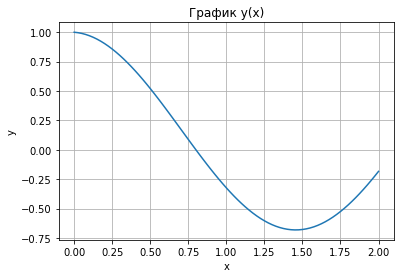

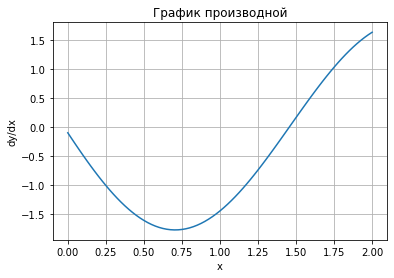

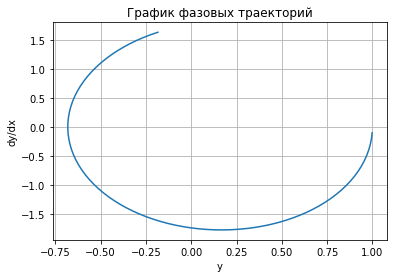

In [38]:
h = 0.2
E = 0.01

Y1_new = []
Y2 = []
X = np.arange(0,2+h,h)
for i in range(len(X)):
    Y1_new.append(y1_n(X[i],i))
    Y2.append(y2_n(X[i],i))
Y1 = np.zeros(len(Y1_new))

while (abs(np.max(Y1_new)-np.max(Y1)) > E):
    h = h/2
    Y1 = Y1_new
    Y1_new = []
    Y2 = []
    X = np.arange(0,2+h,h)
    for i in range(len(X)):
        Y1_new.append(y1_n(X[i],i))
        Y2.append(y2_n(X[i],i))

print ('Оптимальный шаг: ',h)

pylab.title('График y(x)')
pylab.xlabel('x')
pylab.ylabel('y')
plt.plot(X,Y1_new)
plt.grid(True)
plt.show()

pylab.title('График производной')
pylab.xlabel('x')
pylab.ylabel('dy/dx')
plt.plot(X,Y2)
plt.grid(True)
plt.show()

pylab.title('График фазовых траекторий')
pylab.xlabel('y')
pylab.ylabel('dy/dx')
plt.plot(Y1_new,Y2)
plt.grid(True)
plt.show()